In [1]:
# for data handling
import pandas as pd
import numpy as np

# train-test split
from sklearn.model_selection import train_test_split

# loss functions for today
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# stuff for evaluating classifiers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # for displaying a pretty confusion matrix

# dummy models for comparison
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# visual models
import seaborn as sns
import matplotlib.pyplot as plt

Due to an error in the dataset the airport identifiers from the entirety of October are compromised of intergers instead of the airport ID. This is quite troublesome to fix which is why we've decided to remove the rows from October even though this will defininetly decrease the accuracy of our model.

In [2]:
flight_df = pd.read_csv('flights.csv', dtype={'DESTINATION_AIRPORT': str, 'ORIGIN_AIRPORT': str})

In [3]:
airports_df = pd.read_csv('airports.csv')

In [5]:
airports_df.head()
#airports_df.shape

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [4]:
f_df = flight_df.copy()
a_df = airports_df.copy()

In [20]:
#f_df = pd.merge(f_df, a_df, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')
#f_df = f_df.rename(columns={'STATE': 'ORIGIN_STATE'})

#f_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,ORIGIN_STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [5]:
f_df = pd.merge(f_df, a_df, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')
f_df = f_df.rename(columns={'STATE': 'ORIGIN_STATE'})
f_df = f_df.drop(columns=['IATA_CODE'])

f_df = pd.merge(f_df, a_df, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left')
f_df = f_df.rename(columns={'STATE': 'DESTINATION_STATE'})
f_df = f_df.drop(columns=['IATA_CODE'])

f_df['ORIGIN_STATE'] = f_df['ORIGIN_STATE']
f_df['DESTINATION_STATE'] = f_df['DESTINATION_STATE']

f_df.head()    

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ORIGIN_STATE,COUNTRY_x,LATITUDE_x,LONGITUDE_x,AIRPORT_y,CITY_y,DESTINATION_STATE,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [6]:
f_df = f_df.drop(['COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x', 'AIRPORT_y', 'CITY_y', 'COUNTRY_y', 'LATITUDE_y',
                  'LONGITUDE_y', 'AIRPORT_x', 'CITY_x'], axis=1)


In [7]:
#flight_df_new = flight_df.copy()
#remove_october = flight_df_new[flight_df_new['MONTH'] == 10]

#flight_df_filtered = flight_df_new[~remove_october]
#flight_df_filtered = flight_df.drop(flight_df[remove_october].index)

f_df = f_df[f_df['MONTH'] != 10]

#flight_df = flight_df[flight_df['MONTH'] == 10]

f_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_STATE,DESTINATION_STATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AK,WA
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,CA,FL
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,CA,NC
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,CA,FL
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,WA,AK


In [8]:
#f_df = f_df.sample(n=500000, random_state=42)

f_df = f_df.sample(n=5000000, random_state=42)

#f_df.head()

In [36]:
f_df[['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']].head(30)

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL
4184260,700,959
1523550,1205,1530
3257379,555,656
4128422,1530,2305
3025631,1030,1144
444275,755,955
3595454,600,1403
2493997,1435,2230
2514246,1730,2014
4278340,807,1025


In [9]:
f_df['SCHEDULED_DEPARTURE'] = pd.to_datetime(f_df['SCHEDULED_DEPARTURE'], format='%H%M', errors='coerce')

f_df['SCHEDULED_ARRIVAL'] = pd.to_datetime(f_df['SCHEDULED_ARRIVAL'], format='%H%M', errors='coerce')

f_df['DEPARTURE_HOUR'] = f_df['SCHEDULED_DEPARTURE'].dt.hour
f_df['DEPARTURE_MINUTE'] = f_df['SCHEDULED_DEPARTURE'].dt.minute

f_df['ARRIVAL_HOUR'] = f_df['SCHEDULED_ARRIVAL'].dt.hour
f_df['ARRIVAL_MINUTE'] = f_df['SCHEDULED_ARRIVAL'].dt.minute

f_df = f_df.drop(['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL'], axis=1)



# Exploratory

In [10]:
f_df.shape

(800000, 35)

In [11]:
f_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,...,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_STATE,DESTINATION_STATE,DEPARTURE_HOUR,DEPARTURE_MINUTE,ARRIVAL_HOUR,ARRIVAL_MINUTE
4184260,2015,9,18,5,B6,23,N923JB,JFK,LAX,655.0,...,NaN,NaN,NaN,NaN,NY,CA,7.0,0.0,9.0,59.0
1523550,2015,4,8,3,US,1745,N838AW,IAH,CLT,1221.0,...,NaN,NaN,NaN,NaN,TX,NC,12.0,5.0,15.0,30.0
3257379,2015,7,23,4,MQ,3384,N642MQ,MLI,ORD,604.0,...,NaN,NaN,NaN,NaN,IL,IL,5.0,55.0,6.0,56.0
4128422,2015,9,14,1,WN,1913,N478WN,LAS,IAD,1536.0,...,NaN,NaN,NaN,NaN,NV,VA,15.0,30.0,23.0,5.0
3025631,2015,7,9,4,EV,5165,N582CA,ATL,GRK,1027.0,...,NaN,NaN,NaN,NaN,GA,TX,10.0,30.0,11.0,44.0


In [25]:
f_df['ARRIVAL_DELAY'].max()

122.0

In [26]:
f_df['ARRIVAL_DELAY'].min()

-69.0

In [30]:
f_df['ARRIVAL_DELAY'].median()

-5.0

Potential outlier - remove?

In [15]:
from scipy import stats

z_scores = stats.zscore(f_df['ARRIVAL_DELAY'])
abs_z_scores = abs(z_scores)

# Define a threshold (e.g., 3) for outlier detection
threshold = 3
outliers = (abs_z_scores > threshold)

# Remove outliers
f_df = f_df[~outliers]

# Preprocessing

According to the FAA a flight is considered delayed it is delayed by 15 minutes or more. However, although this is relevant for stakeholdes such as airlines and airports to look at once a number has been predicted the code beloew itself is redundant due to the fact that the model won't know that a flight can actually arrive on time. This will make it assume that all flights, to some degree, are gonna be delayed.

In [13]:
#df_fd = flight_df.copy()
f_df = f_df[f_df.ARRIVAL_DELAY > 15]

f_df.shape

(90864, 35)

We'll clear out some irrelevant columns and retain those we need for our prediction analysis.

In [10]:
# We will not consider cancelled or diverted flights as we are only concerned with delays
#df_fd = df_fd[df_fd.CANCELLED != 1]
#df_fd = df_fd[df_fd.DIVERTED != 1]

# Drop all columns that do not add interpretability to the model
f_df = f_df.drop(['YEAR', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'TAXI_OUT','WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME',
                  'WHEELS_ON','TAXI_IN','ARRIVAL_TIME','DIVERTED','CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
                   'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], axis=1)

# Drop TAIL_NUMBER for now due to value error
f_df = f_df.drop(['TAIL_NUMBER', 'FLIGHT_NUMBER', 'DISTANCE'], axis=1)
    
# Fill NaNs - just to make sure
#df_fd = df_fd.fillna(0)

f_df.head(30)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE,DEPARTURE_HOUR,DEPARTURE_MINUTE,ARRIVAL_HOUR,ARRIVAL_MINUTE
4184260,9,18,5,B6,JFK,LAX,359.0,-8.0,NY,CA,7.0,0.0,9.0,59.0
1523550,4,8,3,US,IAH,CLT,145.0,10.0,TX,NC,12.0,5.0,15.0,30.0
3257379,7,23,4,MQ,MLI,ORD,61.0,-8.0,IL,IL,5.0,55.0,6.0,56.0
4128422,9,14,1,WN,LAS,IAD,275.0,-12.0,NV,VA,15.0,30.0,23.0,5.0
3025631,7,9,4,EV,ATL,GRK,134.0,-19.0,GA,TX,10.0,30.0,11.0,44.0
444275,1,30,5,WN,MCO,AUS,180.0,-16.0,FL,TX,7.0,55.0,9.0,55.0
3595454,8,12,3,UA,LAX,IAD,303.0,-6.0,CA,VA,6.0,0.0,14.0,3.0
2493997,6,7,7,HA,OGG,SFO,295.0,-8.0,HI,CA,14.0,35.0,22.0,30.0
2514246,6,8,1,AA,LAX,OGG,344.0,-11.0,CA,HI,17.0,30.0,20.0,14.0
4278340,9,24,4,UA,PHL,DEN,258.0,-18.0,PA,CO,8.0,7.0,10.0,25.0


Encoding

In [11]:
f_df = f_df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis=1)


columns_to_encode = ['AIRLINE', 'ORIGIN_STATE', 'DESTINATION_STATE']

f_df = pd.get_dummies(f_df, columns=columns_to_encode,  drop_first=True)

f_df.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_TIME,ARRIVAL_DELAY,DEPARTURE_HOUR,DEPARTURE_MINUTE,ARRIVAL_HOUR,ARRIVAL_MINUTE,AIRLINE_AS,...,DESTINATION_STATE_TN,DESTINATION_STATE_TX,DESTINATION_STATE_UT,DESTINATION_STATE_VA,DESTINATION_STATE_VI,DESTINATION_STATE_VT,DESTINATION_STATE_WA,DESTINATION_STATE_WI,DESTINATION_STATE_WV,DESTINATION_STATE_WY
4184260,9,18,5,359.0,-8.0,7.0,0.0,9.0,59.0,0,...,0,0,0,0,0,0,0,0,0,0
1523550,4,8,3,145.0,10.0,12.0,5.0,15.0,30.0,0,...,0,0,0,0,0,0,0,0,0,0
3257379,7,23,4,61.0,-8.0,5.0,55.0,6.0,56.0,0,...,0,0,0,0,0,0,0,0,0,0
4128422,9,14,1,275.0,-12.0,15.0,30.0,23.0,5.0,0,...,0,0,0,1,0,0,0,0,0,0
3025631,7,9,4,134.0,-19.0,10.0,30.0,11.0,44.0,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
f_df.shape

(4795778, 128)

In [15]:
f_df.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_TIME,ARRIVAL_DELAY,DEPARTURE_HOUR,DEPARTURE_MINUTE,ARRIVAL_HOUR,ARRIVAL_MINUTE,AIRLINE_AS,...,DESTINATION_STATE_TN,DESTINATION_STATE_TX,DESTINATION_STATE_UT,DESTINATION_STATE_VA,DESTINATION_STATE_VI,DESTINATION_STATE_VT,DESTINATION_STATE_WA,DESTINATION_STATE_WI,DESTINATION_STATE_WV,DESTINATION_STATE_WY
4184260,9,18,5,359.0,-8.0,7.0,0.0,9.0,59.0,0,...,0,0,0,0,0,0,0,0,0,0
1523550,4,8,3,145.0,10.0,12.0,5.0,15.0,30.0,0,...,0,0,0,0,0,0,0,0,0,0
3257379,7,23,4,61.0,-8.0,5.0,55.0,6.0,56.0,0,...,0,0,0,0,0,0,0,0,0,0
4128422,9,14,1,275.0,-12.0,15.0,30.0,23.0,5.0,0,...,0,0,0,1,0,0,0,0,0,0
3025631,7,9,4,134.0,-19.0,10.0,30.0,11.0,44.0,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
nan_check = f_df.isna().sum()

# Display the NaN counts for each column
print(nan_check)

MONTH                   0
DAY                     0
DAY_OF_WEEK             0
SCHEDULED_TIME          0
DISTANCE                0
                       ..
DESTINATION_STATE_VT    0
DESTINATION_STATE_WA    0
DESTINATION_STATE_WI    0
DESTINATION_STATE_WV    0
DESTINATION_STATE_WY    0
Length: 129, dtype: int64


In [19]:
# View rows where there are NaN values
nan_rows = f_df[f_df.isna().any(axis=1)]

# Display the resulting DataFrame
print(nan_rows)

         MONTH  DAY  DAY_OF_WEEK  SCHEDULED_TIME  ARRIVAL_DELAY  \
144774       1   10            6            70.0            NaN   
2631126      6   15            1           193.0            NaN   
2516662      6    8            1           322.0            NaN   
1548401      4    9            4            85.0            NaN   
3406572      7   31            5            89.0            NaN   
...        ...  ...          ...             ...            ...   
975739       3    5            4           260.0            NaN   
3689108      8   17            1           165.0            NaN   
967760       3    5            4           390.0            NaN   
5458944     12    8            2           150.0            NaN   
2618944      6   14            7           112.0           -6.0   

         DEPARTURE_HOUR  DEPARTURE_MINUTE  ARRIVAL_HOUR  ARRIVAL_MINUTE  \
144774              8.0              50.0          10.0             0.0   
2631126            16.0              30.0    

In [13]:
# Use iloc to view the specific row
specific_row = f_df.iloc[1]

# Display the resulting Series (row)
print(specific_row)

MONTH                     4.0
DAY                       8.0
DAY_OF_WEEK               3.0
SCHEDULED_TIME          145.0
ARRIVAL_DELAY            10.0
                        ...  
DESTINATION_STATE_VT      0.0
DESTINATION_STATE_WA      0.0
DESTINATION_STATE_WI      0.0
DESTINATION_STATE_WV      0.0
DESTINATION_STATE_WY      0.0
Name: 1523550, Length: 128, dtype: float64


In [13]:
f_df = f_df.dropna()

Train-Test split

In [17]:
y = f_df['ARRIVAL_DELAY']
X = f_df.drop('ARRIVAL_DELAY', axis=1)

#X = f_df.drop(['ARRIVAL_DELAY', 'SCHEDULED_TIME', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL'], axis=1) #Training: 0.346, Test: 0.029

#X = f_df[['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_TIME', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']] #Training: 0.638, Test: -0.016

#X = f_df.drop(['ARRIVAL_DELAY', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_TIME', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL'], axis=1) #Training: 0.039, Test: 0.006

Creating training and test size

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Regression

In [20]:
f_df = f_df.sample(n=300000, random_state=42)

f_df.shape

(300000, 128)

In [35]:
f_df.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_TIME,ARRIVAL_DELAY,DEPARTURE_HOUR,DEPARTURE_MINUTE,ARRIVAL_HOUR,ARRIVAL_MINUTE,AIRLINE_AS,...,DESTINATION_STATE_TN,DESTINATION_STATE_TX,DESTINATION_STATE_UT,DESTINATION_STATE_VA,DESTINATION_STATE_VI,DESTINATION_STATE_VT,DESTINATION_STATE_WA,DESTINATION_STATE_WI,DESTINATION_STATE_WV,DESTINATION_STATE_WY
3762562,8,22,6,87.0,-7.0,6.0,30.0,7.0,57.0,0,...,0,0,0,0,0,0,0,0,0,0
221496,1,15,4,245.0,-6.0,11.0,15.0,17.0,20.0,0,...,0,0,0,0,0,0,0,0,0,0
2975552,7,6,1,92.0,3.0,12.0,20.0,13.0,52.0,0,...,0,0,0,0,0,0,0,0,0,0
5536991,12,13,7,85.0,-6.0,20.0,0.0,21.0,25.0,0,...,0,0,0,0,0,0,0,0,0,0
4069154,9,10,4,520.0,-2.0,16.0,10.0,6.0,50.0,0,...,0,0,0,0,0,0,0,0,0,0


Code should be working, however requires a lot of memory unless we downsize the amount of rows.

In [23]:
fd_lr = LinearRegression()

fd_lr.fit(X_train, y_train)

lr_y_pred = fd_lr.predict(X_test)


print("Score on training set: {:.3f}".format(fd_lr.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(fd_lr.score(X_test, y_test)))

mse = mean_squared_error(y_test, lr_y_pred)

print(f'Mean Squared Error: {mse}')

Score on training set: 0.037
Score on test set: 0.039
Mean Squared Error: 573.7374444239067


In [31]:
print("Score on training set: {:.3f}".format(fd_lr.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(fd_lr.score(X_test, y_test)))

mse = mean_squared_error(y_test, rf_y_pred)

print(f'Mean Squared Error: {mse}')

Score on training set: 0.017
Score on test set: 0.014


This horrendous score might be due to non-linearity

Polynomial features

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2

# Create a polynomial regression model using a pipeline
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the training set
model.fit(X_train, y_train)

# Predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Score on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(model.score(X_test, y_test)))

mse = mean_squared_error(y_test, y_test_pred)

print(f'Mean Squared Error: {mse}')


MemoryError: Unable to allocate 12.9 GiB for an array with shape (210000, 8256) and data type float64

KNN regressor

In [ ]:
kn = KNeighborsRegressor()
kn.fit(X_train,y_train)
kn_y_pred = kn.predict(X_test)
print("Score on training set: {:.3f}".format(kn.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(kn.score(X_test, y_test)))

mse = mean_squared_error(y_test, lr_y_pred)

print(f'Mean Squared Error: {mse}')

# Random forest regressor

In [43]:
rf = RandomForestClassifier(max_depth=20)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.742
Accuracy on test set: 0.028


In [19]:
rf = RandomForestRegressor(max_depth=20)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

mse = mean_squared_error(y_test, rf_y_pred)

print(f'Mean Squared Error: {mse}')

Accuracy on training set: 0.363
Accuracy on test set: 0.157
Mean Squared Error: 499.5917959183099


In [23]:
rf = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=8, max_depth=30)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

mse = mean_squared_error(y_test, rf_y_pred)

print(f'Mean Squared Error: {mse}')

Accuracy on training set: 0.401
Accuracy on test set: 0.136
Mean Squared Error: 515.7320219368723


Feature selection

In [57]:
print("Feature importances:", rf.feature_importances_)

Feature importances: [7.27807708e-02 1.21382293e-01 5.77900038e-02 1.24860554e-01
 1.23367080e-01 1.31642207e-01 2.71352894e-03 4.63687360e-03
 5.94869796e-03 5.28317370e-03 4.42512992e-03 2.40484541e-03
 3.75074996e-03 5.61783939e-03 4.75855497e-03 7.43404998e-03
 2.82091737e-03 2.01705237e-03 6.55915308e-03 2.23693313e-03
 1.93504727e-03 4.10502131e-03 6.69398882e-03 5.25285200e-03
 7.73068815e-04 2.38286859e-04 7.76375048e-03 5.60301845e-03
 4.26378831e-08 1.31495070e-03 1.82056703e-03 1.31001671e-03
 9.62114640e-03 2.19426774e-03 1.34831438e-03 3.18123618e-03
 4.42842401e-03 3.52527074e-03 4.60041522e-03 8.67518676e-04
 4.75108426e-03 3.18832082e-03 4.41146487e-03 5.13769106e-04
 9.32118040e-04 3.18325153e-03 8.00649866e-04 1.33587845e-03
 1.07098896e-03 5.06163532e-03 9.60759092e-04 4.86028599e-03
 7.32351821e-03 4.71381295e-03 2.98084654e-03 2.48219960e-03
 4.62834555e-03 1.30700094e-03 1.84081090e-03 1.31971137e-03
 1.48034599e-03 4.61308107e-03 8.93551684e-03 2.18972278e-03
 6.

In [61]:
# Sort feature importances in descending order
sorted_importances = np.sort(rf.feature_importances_)[::-1]

# Calculate the cumulative sum of importances
cumulative_importances = np.cumsum(sorted_importances)

# Find the threshold for the top 90% of features
threshold = np.percentile(cumulative_importances, 90)

print("Threshold:", threshold)


Threshold: 0.9971522073243786


In [53]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf, threshold=threshold)
sfm.fit(X_train, y_train)

# Transform the training data to keep only the selected features
X_train_selected = sfm.transform(X_train)

# Transform the test data to keep only the selected features
X_test_selected = sfm.transform(X_test)

C:\Anaconda\Lib\site-packages\sklearn\feature_selection\_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\feature_selection\_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


Cross-validation

In [35]:
from sklearn.model_selection import cross_val_score, KFold

k_folds = 5  # or any other desired number of folds
cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

scores = cross_val_score(rf, X, y, cv=cv, scoring='neg_mean_squared_error')

print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

KeyboardInterrupt: 

GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object with r2_score as the scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best R-squared Score: {:.4f}".format(grid_search.best_score_))

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model on the test set using R-squared
r2 = r2_score(y_test, rf_y_pred)
print("R-squared on Test Set: {:.4f}".format(r2))


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best R-squared Score: 0.0113
R-squared on Test Set: 0.0144


Random search cv

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution to search
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, scoring='r2', cv=5, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best R-squared Score: {:.4f}".format(random_search.best_score_))

# Use the trained model to make predictions on the test set and calculate R-squared
r2_test = random_search.best_estimator_.score(X_test, y_test)
print("R-squared on Test Set: {:.4f}".format(r2_test))


Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 30}
Best R-squared Score: 0.0312
R-squared on Test Set: 0.0375


In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'] + list(np.linspace(0.1, 1.0, 10))
}

#print(param_distributions)

{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]), 'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([1, 2, 3, 4]), 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt', 'log2', 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0]}


In [ ]:
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", random_search.best_params_)
#print("Best R-squared Score: {:.4f}".format(random_search.best_score_))



# Evaluating residuals

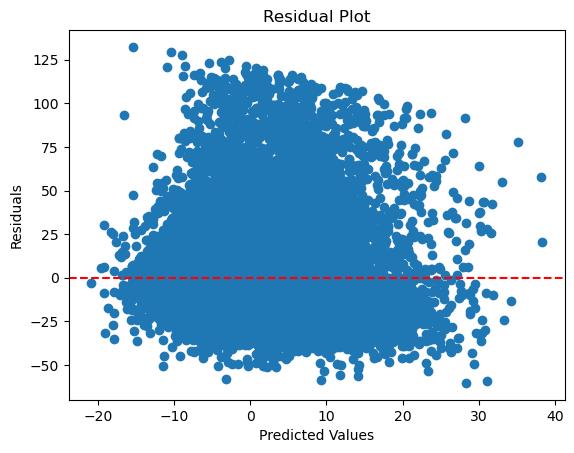

In [24]:
import matplotlib.pyplot as plt

residuals = y_test - rf_y_pred

plt.scatter(rf_y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [31]:
mean_residuals = np.mean(residuals)

print(f"Mean of Residuals: {mean_residuals}")

Mean of Residuals: 0.0585686993508811


# Feature importance... again

In [1]:
# Display feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(20).plot(kind='barh')  # Display top 10 features
plt.show()


NameError: name 'pd' is not defined

# Check for correlation

In [25]:
f_df = f_df[['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_TIME', 'DEPARTURE_MINUTE', 'DEPARTURE_HOUR', 'ARRIVAL_MINUTE', 'ARRIVAL_HOUR',
             'ARRIVAL_DELAY']]



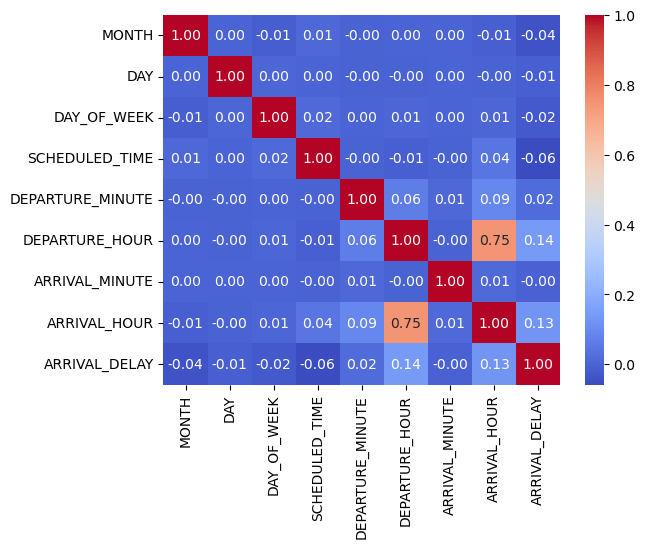

In [26]:
correlation_matrix = f_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

XGBoost

In [24]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.6/99.8 MB 13.3 MB/s eta 0:00:08
    --------------------------------------- 1.6/99.8 MB 17.0 MB/s eta 0:00:06
   - -------------------------------------- 2.8/99.8 MB 20.0 MB/s eta 0:00:05
   - -------------------------------------- 4.1/99.8 MB 21.8 MB/s eta 0:00:05
   - -------------------------------------- 4.9/99.8 MB 21.0 MB/s eta 0:00:05
   -- ------------------------------------- 5.9/99.8 MB 20.8 MB/s eta 0:00:05
   -- ------------------------------------- 6.5/99.8 MB 19.8 MB/s eta 0:00:05
   --- ------------------------------------ 7.5/99.8 MB 20.0 MB/s eta 0:00:05
   --- ------------------------------------ 8.6/99.8 MB 20.4 MB/s eta 0:00:05
   --- ---------------

In [19]:
import xgboost as xgb

In [22]:
xgbmodel = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.05,
                max_depth = 12, min_child_weight = 8, n_estimators = 4000, subsample = 0.7, alpha = 10)

xgbmodel.fit(X_train, y_train)


y_pred = xgbmodel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

print("Accuracy on training set: {:.3f}".format(xgbmodel.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgbmodel.score(X_test, y_test)))



Mean Squared Error: 461.2344968228857
Accuracy on training set: 0.554
Accuracy on test set: 0.228
